# Analysis of the behaviour of a telecom operator's customers

The file `telecom_client.csv` contains many information about the customers of a telecom operator. Let's see if we can analyze this file to help the company to increase its profits.

## Getting started with the dataset

In [56]:
# Using the pandas library, read the file telecom_client.csv
file = "telecom_client.csv"

import pandas as pd

table = pd.read_csv(file)

In [57]:
# How many information (i.e. columns) are in this dataset?
# Don't count them manually! Use a piece of code to do it.
"there is {} information = columns".format( len(table.columns) )

'there is 20 information = columns'

In [58]:
# How many clients does this dataset have?
"there is {} clients = lines".format( len(table) )

'there is 3333 clients = lines'

In [59]:
# Print the first 15 items of this dataset
table[:15]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Termination
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [60]:
# What is the type of the data in the "Total day minutes"
# column?
table["Total day minutes"].dtype

dtype('float64')

In [61]:
# Print the list of the column names
table.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Termination'],
      dtype='object')

In [62]:
# What are the 10 most frequent states?
states = table["State"]
states.value_counts()[:10]

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
Name: State, dtype: int64

In [63]:
# What is the average "Account length" for Ohio (OH)? 
# for New Jersey (NJ)?
acc_len = table["Account length"]
acc_len_OH = acc_len[table.State == "OH"]
print('the average "Account length" for Ohio is', acc_len_OH.sum() / len(acc_len_OH))
acc_len_NJ = acc_len[table.State == "NJ"]
print('the average "Account length" for New Jersey is', acc_len_NJ.sum() / len(acc_len_NJ))

the average "Account length" for Ohio is 102.15384615384616
the average "Account length" for New Jersey is 100.20588235294117


In [64]:
# What is the maximum "Total night calls"?
table["Total night calls"].max()

175

In [65]:
# What is the state with the maximum "Total night calls"?
print('the state having the user with the maximum "Total night calls" is', states[ table["Total night calls"].idxmax ])

# don't work:
#state_total_night_call = table[["State", "Total night calls"]].groupby(by="State").sum()
#max_state = state_total_night_call[ state_total_night_call.idxmax() ]
#print('the state having maximum sum of "Total night calls" is', max_state)

the state having the user with the maximum "Total night calls" is RI


## Finding a problem

In [66]:
# The dataset contains a column "Termination" which
# indicates if the client has terminated its contract with 
# the operator. Find the number of people who terminated
# their contract.
len(table[ table["Termination"] == True ])

483

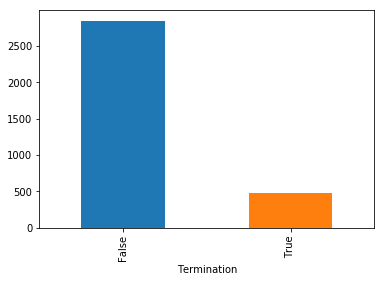

In [67]:
# Represent the number of person who terminated their
# contract and those who didn't with a vertical bar chart.
group_by_termination = table.groupby(by="Termination")
termination_count = group_by_termination["Termination"].count()
%matplotlib inline
termination_count.plot(kind="bar")

In [68]:
# Find the ratio of people who terminated their contract
# among all users.
ratio = len(table[ table["Termination"] == True ]) / len(table)
print("the ratio of people who terminated their contract is", ratio)

the ratio of people who terminated their contract is 0.14491449144914492


In [69]:
# What is you opinion about this ratio ?
print("""Only 14% of clients who have terminated their contract seems very good.
It seems that old clients get removed from the database on a regular basis.""")

Only 14% of clients who have terminated their contract seems very good.
It seems that old clients get removed from the database on a regular basis.


## Identifying similar patterns

To increase its profits, the company should keep its customers and prevent them to terminate their contract. There may be a common reason why customers terminate.

In [70]:
# Find the mean of all fields for users who terminated
# their contracts.
terminated_contracts = table[ table["Termination"] == True ]
terminated_contracts.mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Termination                 1.000000
dtype: float64

In [71]:
# Find the mean of all fields for users who didn't
# terminated their contracts.
ongoing_contracts = table[ table["Termination"] == False ]
ongoing_contracts.mean()

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Termination                 0.000000
dtype: float64

In [72]:
# Compare it to the mean of the previous question.
pd.DataFrame([ongoing_contracts.mean(), terminated_contracts.mean()], index =
             ["Mean for ongoing contracts", "Mean for terminated contracts"]).transpose()

,Mean for ongoing contracts,Mean for terminated contracts
Account length,100.793684,102.664596
Area code,437.074737,437.817805
Number vmail messages,8.604561,5.115942
Total day minutes,175.175754,206.914079
Total day calls,100.283158,101.335404
Total day charge,29.780421,35.175921
Total eve minutes,199.043298,212.410145
Total eve calls,100.038596,100.561077
Total eve charge,16.918909,18.054969
Total night minutes,200.133193,205.231677


In [73]:
# Do you see large differences?
print('Clients who have terminated their contracts have far less "Number vmail messages"',
      'and substentialy more "Customer service calls".')

Clients who have terminated their contracts have far less "Number vmail messages" and substentialy more "Customer service calls".


In [74]:
# Find the following information:
#  - number of users with a contract AND (NO International plan AND NO Voice mail plan)
#  - number of users with a contract AND (International plan OR Voice mail plan)
#  - number of users with a contract AND (International plan AND Voice mail plan)
#  - the same 3 information for users who terminated their contract
ongoing_contracts_stats = pd.Series()
ongoing_contracts_stats["NO International plan AND NO Voice mail plan"] = len(
     ongoing_contracts[ (ongoing_contracts["International plan"] == "No")
                       & (ongoing_contracts["Voice mail plan"] == "No")
                      ])
ongoing_contracts_stats["International plan OR Voice mail plan"] = len(
     ongoing_contracts[ (ongoing_contracts["International plan"] == "Yes")
                       | (ongoing_contracts["Voice mail plan"] == "Yes")
                      ])
ongoing_contracts_stats["International plan AND Voice mail plan"] = len(
     ongoing_contracts[ (ongoing_contracts["International plan"] == "Yes")
                       & (ongoing_contracts["Voice mail plan"] == "Yes")
                      ])

terminated_contracts_stats = pd.Series()
terminated_contracts_stats["NO International plan AND NO Voice mail plan"] = len(
     terminated_contracts[ (terminated_contracts["International plan"] == "No")
                          & (terminated_contracts["Voice mail plan"] == "No")
                         ])
terminated_contracts_stats["International plan OR Voice mail plan"] = len(
     terminated_contracts[ (terminated_contracts["International plan"] == "Yes")
                          | (terminated_contracts["Voice mail plan"] == "Yes")
                         ])
terminated_contracts_stats["International plan AND Voice mail plan"] = len(
     terminated_contracts[ (terminated_contracts["International plan"] == "Yes")
                          & (terminated_contracts["Voice mail plan"] == "Yes")
                         ])

stats = pd.DataFrame([ongoing_contracts_stats, terminated_contracts_stats],
             index = ["Clients with ongoing contracts", "Clients who terminated their contracts"])

In [75]:
stats

,NO International plan AND NO Voice mail plan,International plan OR Voice mail plan,International plan AND Voice mail plan
Clients with ongoing contracts,1878,972,56
Clients who terminated their contracts,302,181,36


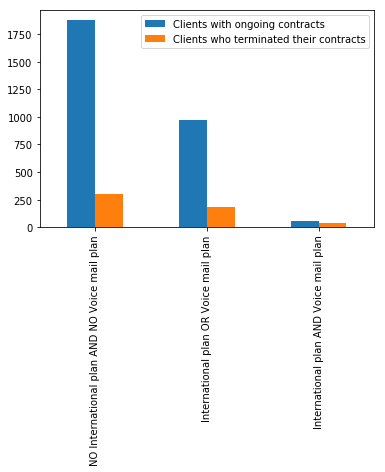

In [76]:
# Print the 6 previous information in a vertical bar graph
# Add a legend to differenciate the different categories
stats.transpose().plot(kind="bar")

In [77]:
# Add a new column "Total charge" that is the sum of 4
# other colums :
#   - "Total day charge"
#   - "Total eve charge"
#   - "Total night charge"
#   - "Total intl charge"
table["Total charge"] = table["Total day charge"] + table["Total eve charge"] \
                        + table["Total night charge"] + table["Total intl charge"]
print('Verification of the new "Total charge" column:')
table[:5]

Verification of the new "Total charge" column:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Termination,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


Termination
False    58.448807
True     65.355963
Name: Total charge, dtype: float64


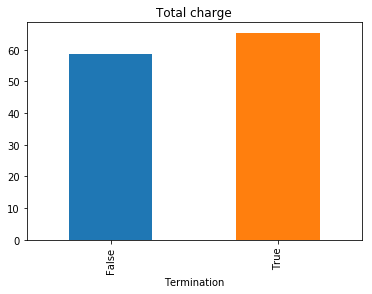

In [78]:
# Find the mean of "Total charge" for users with a contract
# and thos who terminated.
total_charge_by_termination = group_by_termination["Total charge"].mean()
print(total_charge_by_termination)
total_charge_by_termination.plot(kind = "bar", title = "Total charge")

In [79]:
# Do you have any opinion on this result?
print("User who terminated their contracts were charged {}% more in average.".format(
    100 * total_charge_by_termination[True] / total_charge_by_termination[False] - 100))
print("This can mean that overcharged user are more likely to terminate their contract")

User who terminated their contracts were charged 11.81744515897853% more in average.
This can mean that overcharged user are more likely to terminate their contract


In [80]:
# Find the people with at least 4 calls to customer 
# service. What is the ratio of users who terminated among
# these users?
user_with_4_calls = table[ table["Customer service calls"] >= 4 ]
ratio = len(user_with_4_calls[ user_with_4_calls["Termination"] == True ]) / len(user_with_4_calls)
print("The ratio of users who terminated among users with at least 4 calls is", ratio)
print("This is extremely high, so the misatisfaction of the clients torward the support is \
probably one of the most important reason of people terminating their contract")

The ratio of users who terminated among users with at least 4 calls is 0.5168539325842697
This is extremely high, so the misatisfaction of the clients torward the support is probably one of the most important reason of people terminating their contract
